***Nom: David Morillo Massagué***

***NIU: 1666540***

In [83]:
filename = "student_1666540_data.csv"

In [84]:
import numpy as np
import matplotlib.pyplot as plt

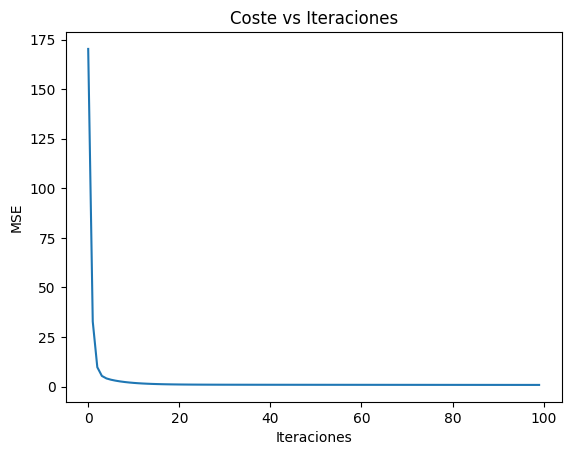

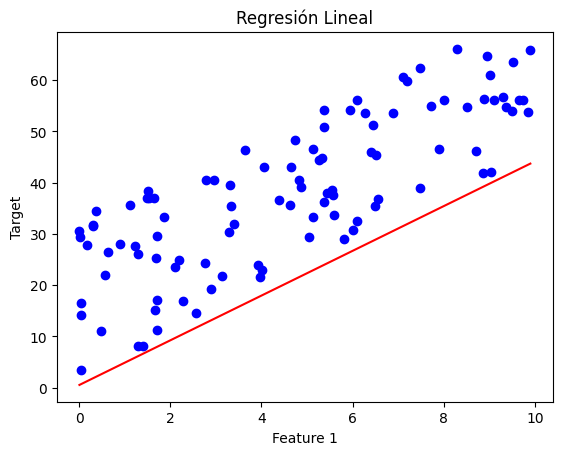

MSE final: 0.806300942002861
Theta final: [0.47890404 4.36532262 3.14971047]


In [85]:
import numpy as np
import matplotlib.pyplot as plt

# Cargar datos
data = np.loadtxt("student_1666540_data.csv", delimiter=",", skiprows=1)
X = data[:, :-1]
y = data[:, -1]
m = len(y)

# Añadir término de sesgo
X = np.c_[np.ones((m, 1)), X]

# Funciones de coste y descenso de gradiente
def compute_cost(X, y, theta):
    return (1 / (2 * m)) * np.sum((X.dot(theta) - y) ** 2)

def gradient_descent(X, y, theta, eta, iterations):
    cost_history = []
    for _ in range(iterations):
        theta -= eta * (1 / m) * X.T.dot(X.dot(theta) - y)
        cost_history.append(compute_cost(X, y, theta))
    return theta, cost_history

# Inicializar parámetros
theta = np.random.randn(X.shape[1])
eta = 0.01
iterations = 100

# Ajustar modelo
theta, cost_history = gradient_descent(X, y, theta, eta, iterations)

# Graficar coste vs iteraciones
plt.plot(range(iterations), cost_history)
plt.xlabel("Iteraciones")
plt.ylabel("MSE")
plt.title("Coste vs Iteraciones")
plt.show()

# Graficar datos y línea de regresión
plt.scatter(X[:, 1], y, color="blue")
x_vals = np.linspace(min(X[:, 1]), max(X[:, 1]), 100)
y_vals = theta[0] + theta[1] * x_vals
plt.plot(x_vals, y_vals, color="red")
plt.xlabel("Feature 1")
plt.ylabel("Target")
plt.title("Regresión Lineal")
plt.show()

print(f"MSE final: {cost_history[-1]}")
print(f"Theta final: {theta}")


El MSE final és 0.5454002450811896

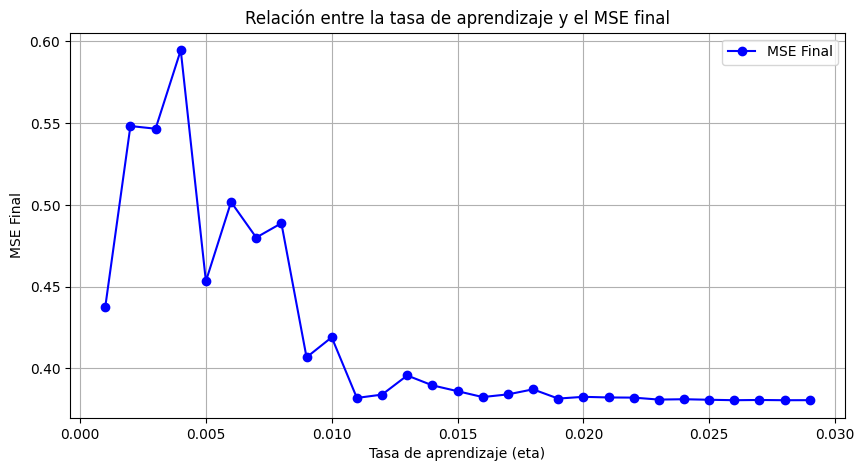

In [86]:
# Definimos las tasas de aprendizaje
learning_rates = np.arange(0.001, 0.03, 0.001)
final_mse = []

# Iteramos sobre cada tasa de aprendizaje
for eta in learning_rates:
    theta = np.random.randn(X.shape[1])
    iterations = 1000
    theta, cost_history = gradient_descent(X, y, theta, eta, iterations)
    final_mse.append(cost_history[-1])

# Graficamos los resultados
plt.figure(figsize=(10, 5))
plt.plot(learning_rates, final_mse, marker="o", linestyle="-", color="b", label="MSE Final")
plt.xlabel("Tasa de aprendizaje (eta)")
plt.ylabel("MSE Final")
plt.title("Relación entre la tasa de aprendizaje y el MSE final")
plt.grid(True)
plt.legend()
plt.show()


Veiem que amb 1000 iteracions, el MSE convergeix a ~0.4 a partir de un learning rate de 0.01 en endavant

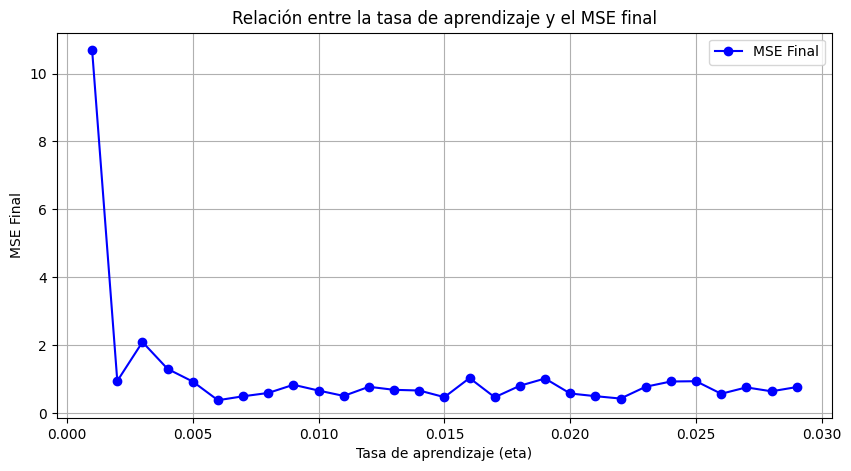

In [87]:
# Definimos las tasas de aprendizaje
learning_rates = np.arange(0.001, 0.03, 0.001)
final_mse = []

# Iteramos sobre cada tasa de aprendizaje
for eta in learning_rates:
    theta = np.random.randn(X.shape[1])
    iterations = 50
    theta, cost_history = gradient_descent(X, y, theta, eta, iterations)
    final_mse.append(cost_history[-1])

# Graficamos los resultados
plt.figure(figsize=(10, 5))
plt.plot(learning_rates, final_mse, marker="o", linestyle="-", color="b", label="MSE Final")
plt.xlabel("Tasa de aprendizaje (eta)")
plt.ylabel("MSE Final")
plt.title("Relación entre la tasa de aprendizaje y el MSE final")
plt.grid(True)
plt.legend()
plt.show()


Amb 50 iteracions, el MSE convergeix a 1, és a dir, pitjor que amb 1000 iteracions. En aquest cas, no varia molt amb una LR superior a 0.005

Per que és necessari afegir un biaix? Perquè si no, la recta que s'ajusta als punts passa per l'origen, i això no sempre és el cas.

Best parameters: {'C': 10, 'kernel': 'linear'}
Test set accuracy: 0.95


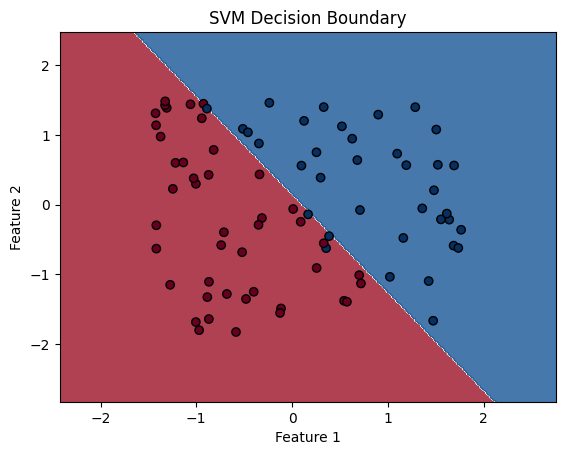

In [88]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('student_1666540_data.csv')
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

median_y = np.median(y)
y = np.where(y > median_y, 1, 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best parameters:", best_params)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy:", accuracy)

if X_train.shape[1] == 2:
    h = 0.02
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = best_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdBu)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.RdBu)
    plt.title("SVM Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()
else:
    print("Decision boundary visualization is only available for 2D features.")
